In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set(style="white")

from crit_finder import graphs


In [2]:
def generate_wishart(N):
    self_outer_product = lambda x: x.dot(x.T)
    wishart_random_matrix = 1/N*self_outer_product(np.random.standard_normal(size=(N,1))).astype(np.float32)
    
    return wishart_random_matrix

In [3]:
def generate_wigner(N):
    return 1/np.sqrt(N)*np.random.standard_normal(size=(N,N)).astype(np.float32)

def generate_symmetric_wigner(N):
    base_matrix = generate_wigner(N)
    return (1/np.sqrt(2))*(base_matrix+base_matrix.T)

In [13]:
Q = graphs.generate_symmetric(2)
# Q = np.eye(2)

# Q = graphs.generate_wishart(2)

@np.vectorize
def apply(x,y):
    return np.asarray([x,y]).dot(Q).dot(np.asarray([x,y]).T)

In [14]:
points = np.linspace(-3,3,num=100)
xs,ys = np.meshgrid(points,points)

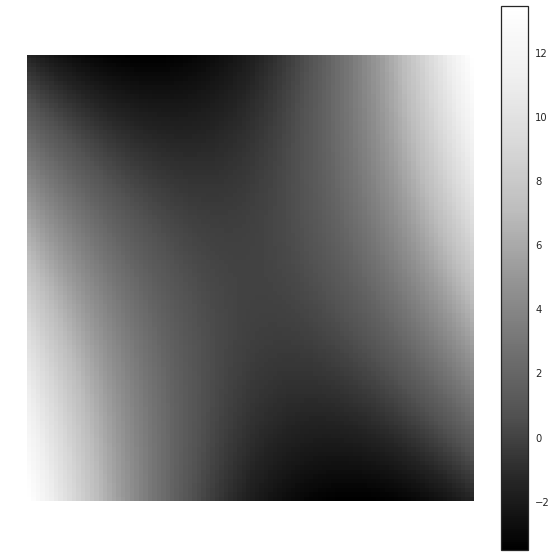

In [15]:
f = plt.figure(figsize=(10,10));
plt.imshow(apply(xs.T,ys.T), cmap='Greys_r'); plt.colorbar();
plt.axis('off');